## Problem Statement:

Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- *LIMIT_BAL* (X1): Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- *SEX* (X2): Gender (1 = male; 2 = female).
- *EDUCATION* (X3): Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- *MARRIAGE* (X4): Marital status (1 = married; 2 = single; 3 = others).
- *AGE* (X5): Age (year).
- *PAY* (X6-X11): History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- *BILL_AMT* (X12-X17): Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- *PAY_AMT* (X18-X23): Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

- *default payment next month* (X24): Result Column 


In [87]:
import pandas as pd
import numpy as np

In [88]:
df = pd.read_excel('../data/default of credit card clients.xls',header=1)

In [89]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [90]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

# EDA


In [91]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [92]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

<Axes: >

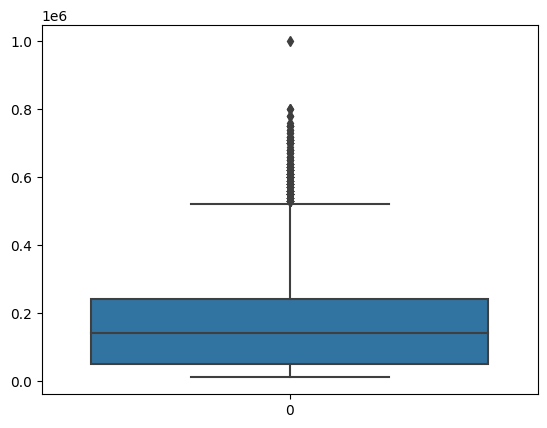

In [94]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.boxplot(df["LIMIT_BAL"])

In [95]:
# Counting the Outlier
column = "LIMIT_BAL"
z_scores = (df[column] - np.mean(df[column])) / np.std(df[column])
outliers = np.abs(z_scores) > 3
print(np.sum(outliers))


130


There are 130 outlier that can be removed

In [96]:
# Function to remove outlier
def remove_outliers_zscore(data, column, threshold=3):
    z_scores = (data[column] - np.mean(data[column])) / np.std(data[column])
    outliers = np.abs(z_scores) > threshold
    cleaned_data = data[~outliers]
    return cleaned_data

In [97]:
df = remove_outliers_zscore(df,'LIMIT_BAL')

<Axes: >

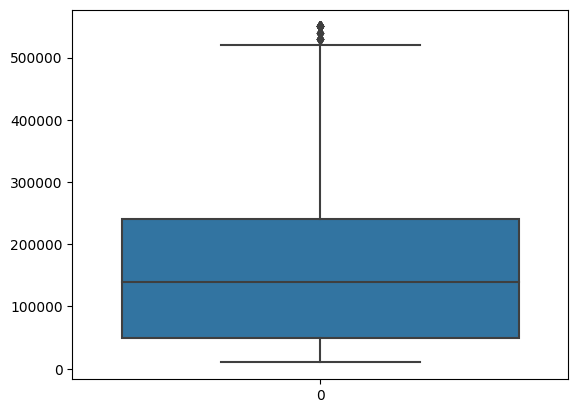

In [98]:
sns.boxplot(df["LIMIT_BAL"])


In [99]:
# Counting the Outlier
def outlier_count(df,column):
    z_scores = (df[column] - np.mean(df[column])) / np.std(df[column])
    outliers = np.abs(z_scores) > 3
    return np.sum(outliers)


In [100]:
print(outlier_count(df,'AGE'))

139


In [101]:
df = remove_outliers_zscore(df,'AGE')
print(outlier_count(df,'AGE'))



30


In [102]:
# Counting the Outlier
def outlier_count(df,column):
    z_scores = (df[column] - np.mean(df[column])) / np.std(df[column])
    outliers = np.abs(z_scores) > 3
    return np.sum(outliers)


columns = [ 'LIMIT_BAL', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in columns:
    print(outlier_count(df,column=col))

21
30
141
157
150
169
162
127
680
669
655
682
650
646
392
304
378
398
430
428


There is no need to remove all the outlier becsause decision tree based model is not effected by outlier

In [103]:
print(outlier_count(df,'PAY_AMT4'))


398


In [104]:
df.shape

(29731, 25)

In [105]:
# df.dtypes

In [106]:
df.shape

(29731, 25)

In [107]:
print(len(df.columns))
df.columns

25


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [108]:
df=df.drop(['ID'],axis=1)

In [109]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,...,29731.000000,29731.000000,29731.000000,29731.000000,2.973100e+04,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000
mean,165188.513000,1.604621,1.852578,1.553833,35.321684,-0.015371,-0.132017,-0.164172,-0.218963,-0.264909,...,42694.399919,39766.716659,38307.982342,5604.161313,5.876170e+03,5122.541892,4766.697084,4692.440786,5134.271737,0.221553
std,126067.164816,0.488940,0.789070,0.521795,8.981364,1.124266,1.197891,1.198071,1.170448,1.134298,...,62752.963892,59219.546926,57922.795962,16340.090907,2.297981e+04,16414.428940,15305.049734,14636.830339,17415.789243,0.415299
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2313.000000,1747.000000,1243.000000,1000.000000,8.255000e+02,390.000000,291.000000,246.500000,109.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19005.000000,18070.000000,16990.000000,2100.000000,2.005000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53797.500000,49913.000000,48904.000000,5002.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000,0.000000
max,550000.000000,2.000000,6.000000,3.000000,63.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29731 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29731 non-null  int64
 1   SEX                         29731 non-null  int64
 2   EDUCATION                   29731 non-null  int64
 3   MARRIAGE                    29731 non-null  int64
 4   AGE                         29731 non-null  int64
 5   PAY_0                       29731 non-null  int64
 6   PAY_2                       29731 non-null  int64
 7   PAY_3                       29731 non-null  int64
 8   PAY_4                       29731 non-null  int64
 9   PAY_5                       29731 non-null  int64
 10  PAY_6                       29731 non-null  int64
 11  BILL_AMT1                   29731 non-null  int64
 12  BILL_AMT2                   29731 non-null  int64
 13  BILL_AMT3                   29731 non-null  int64
 14  BILL_AMT4  

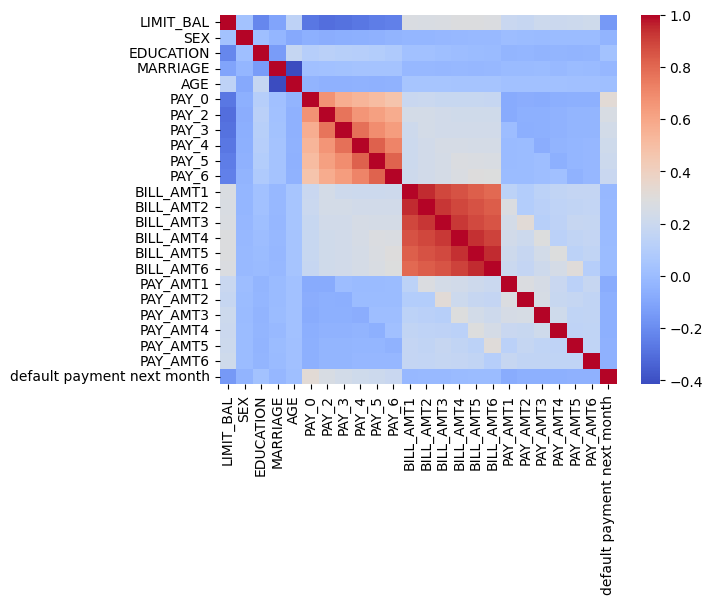

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
sns.heatmap(corr_matrix, cmap='coolwarm')

plt.show()

default payment are mainly dedendent on pay_0,pay_1.........pay_6

In [112]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=1)

# Linear Regression

we shoould not apply linear regression to classification problem still just using for experementation.
You can observe that the accuracy of the model is very low

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define the column transformer with the desired transformations
column_trans = ColumnTransformer([
    ('numeric', StandardScaler(), ['feature1', 'feature2']),
    # Specify other transformations for different columns if needed
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)



0.12243932091857435

In [115]:
x_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

# Linear Regression with standardScaler


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Define the column transformer with the desired transformations
column_trans = ColumnTransformer([
    ('numeric', StandardScaler(), ['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']),
    # Specify other transformations for different columns if needed
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply the column transformer to the training set
x_train_transformed = column_trans.fit_transform(x_train)

# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the transformed training data
lr.fit(x_train_transformed, y_train)

# Apply the column transformer to the testing set
x_test_transformed = column_trans.transform(x_test)

# Predict the target variable for the testing set
y_pred = lr.predict(x_test_transformed)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
r2

0.11902127842039856

# Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of Logistic Regression
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7864469480410291


/home/admi/anaconda3/envs/gen_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression with Standard Scaler

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


# Define the column transformer with the desired transformations
column_trans = ColumnTransformer([
    ('numeric', StandardScaler(), ['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']),
    # Specify other transformations for different columns if needed
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply the column transformer to the training set
x_train_transformed = column_trans.fit_transform(x_train)

# Create an instance of Logistic Regression
model = LogisticRegression()

# Fit the model on the transformed training data
model.fit(x_train_transformed, y_train)

# Apply the column transformer to the testing set
x_test_transformed = column_trans.transform(x_test)

# Predict the target variable for the testing set
y_pred = model.predict(x_test_transformed)


# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Area Under the ROC Curve (AUC-ROC)
probas = model.predict_proba(x_test_transformed)
# auc_roc = roc_auc_score(y_test, probas, multi_class='ovr') # this is for multiclass classification
auc_roc = roc_auc_score(y_test, probas[:, 1])  # Select probabilities for positive class
print("AUC-ROC:", auc_roc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.8150327896418362
Precision: 0.7977080091692921
Recall: 0.8150327896418362
F1-score: 0.7762213128616144
AUC-ROC: 0.7193843553391619
Confusion Matrix:
[[4552  125]
 [ 975  295]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4677
           1       0.70      0.23      0.35      1270

    accuracy                           0.82      5947
   macro avg       0.76      0.60      0.62      5947
weighted avg       0.80      0.82      0.78      5947



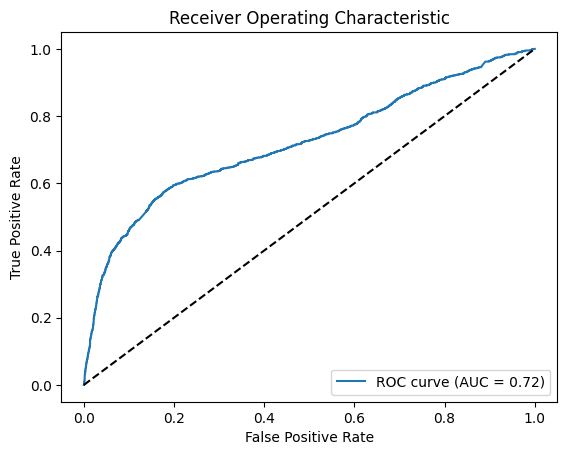

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for each class
probas = model.predict_proba(x_test_transformed)

# Compute the ROC curve for each class
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_test, probas[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [120]:
# Assuming you have your data properly loaded into `x` and `y` variables

# Check the dimensions of your data
print("x shape:", x.shape)
print("y shape:", y.shape)

# Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the dimensions of the split data
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x shape: (29731, 23)
y shape: (29731,)
x_train shape: (23784, 23)
x_test shape: (5947, 23)
y_train shape: (23784,)
y_test shape: (5947,)


### Classification model evaluation methods example

# Decision tree and Random Forest Classifier

In [121]:
print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (29731, 23)
y shape: (29731,)


In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision Tree
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable for the testing set
dt_predictions = dt_model.predict(X_test)

# Calculate the accuracy of the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest
# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing set
rf_predictions = rf_model.predict(X_test)

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Decision Tree Accuracy: 0.7361694972254919
Random Forest Accuracy: 0.8197410459054986


# Best model selection among Logistic Regression, Decision Tree, Random Forest with standard scaler implemention example


In [123]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the models and their respective hyperparameters
models = {
    'Logistic Regression': (LogisticRegression(), {'Logistic Regression__C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'Decision Tree__max_depth': [None, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'Random Forest__n_estimators': [100, 200, 300], 'Random Forest__max_depth': [5]})

}

best_model = None
best_accuracy = 0

# Iterate over the models and perform cross-validation with hyperparameter tuning
for model_name, (model, param_grid) in models.items():
    # Create a pipeline with preprocessing steps and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its accuracy score
    best_estimator = grid_search.best_estimator_
    accuracy = grid_search.best_score_
    
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Cross-Validation Accuracy:", accuracy)
    
    # Evaluate the best model on the test set
    y_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)
    print()
    
    # Check if this model is the best so far
    if test_accuracy > best_accuracy:
        best_model = best_estimator
        best_accuracy = test_accuracy

# Use the best model for predictions
print("Best Model:", best_model)


Model: Logistic Regression
Best Parameters: {'Logistic Regression__C': 1}
Cross-Validation Accuracy: 0.8084848268401063
Test Accuracy: 0.8148646376324197

Model: Decision Tree
Best Parameters: {'Decision Tree__max_depth': 5}
Cross-Validation Accuracy: 0.8202156602292792
Test Accuracy: 0.8214225659996637

Model: Random Forest
Best Parameters: {'Random Forest__max_depth': 5, 'Random Forest__n_estimators': 100}
Cross-Validation Accuracy: 0.815254205523868
Test Accuracy: 0.8173869177736673

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('Decision Tree', DecisionTreeClassifier(max_depth=5))])


In [124]:
# Accuracy over the training data
X_pred = best_estimator.predict(X_train)
train_accuracy = accuracy_score(y_train, X_pred)
print("Train Accuracy:", train_accuracy)



Train Accuracy: 0.8162630339724184


In [125]:
# Check the dimensions of the split data
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (23784, 23)
x_test shape: (5947, 23)
y_train shape: (23784,)
y_test shape: (5947,)


In [126]:
import pickle

# Save the best model to a file using pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [127]:
df.head(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [128]:
input_data = df.iloc[13,:]
print(input_data)
input_data = df.iloc[13,:-1]


LIMIT_BAL                     250000
SEX                                1
EDUCATION                          1
MARRIAGE                           2
AGE                               29
PAY_0                              0
PAY_2                              0
PAY_3                              0
PAY_4                              0
PAY_5                              0
PAY_6                              0
BILL_AMT1                      70887
BILL_AMT2                      67060
BILL_AMT3                      63561
BILL_AMT4                      59696
BILL_AMT5                      56875
BILL_AMT6                      55512
PAY_AMT1                        3000
PAY_AMT2                        3000
PAY_AMT3                        3000
PAY_AMT4                        3000
PAY_AMT5                        3000
PAY_AMT6                        3000
default payment next month         0
Name: 14, dtype: int64


In [129]:
import numpy as np
input_data_scaled = np.reshape(input_data, (1, -1))


# Make the prediction using the preprocessed data
prediction = best_model.predict(input_data_scaled)

# Retrieve the prediction value
prediction_value = prediction[0]

# Print the predicted value
print("Prediction:", prediction_value)


Prediction: 0


/home/admi/anaconda3/envs/gen_env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [130]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
colm = [0,1,13,16,29997,29998,29999]

for i in colm:
    input_data = df.iloc[i,:-1]
    input_data_scaled = np.reshape(input_data, (1, -1))

    # Make the prediction using the scaled data
    prediction = best_model.predict(input_data_scaled)
    pred=prediction[0]
    print(pred)

0
0
0
0


IndexError: single positional indexer is out-of-bounds